In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
# Must import comet before torch, sometimes throws error otherwise.
from img_wang.callbacks import CometCallbackWithGrads
from fastai2.vision.all import show_image, show_images
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
from sklearn.metrics import accuracy_score, f1_score, recall_score, \
                            precision_score, roc_auc_score
import torch
import torch.nn as nn
import torch.nn.functional as F

from htools import *
from img_wang.data import load_img, get_databunch
from img_wang.models import Encoder, SingleInputBinaryModel, \
    TorchvisionEncoder
from img_wang.utils import gpu_setup
from incendio.callbacks import MetricHistory, ModelCheckpoint, EarlyStopper
from incendio.core import Trainer
from incendio.metrics import mean_soft_prediction, std_soft_prediction, percent_positive

In [3]:
cd_root()
gpu_setup()

Current directory: /storage/img-wang
Setting seeds for reproducible training.


## V0

In [4]:
dst, dsv, dlt, dlv = get_databunch('data/imagewang-160/unsup/', 
                                   mode='patchwork', bs=64, pct_pos=.5, 
                                   max_train_len=None, max_val_len=None, 
                                   debug_mode=None)

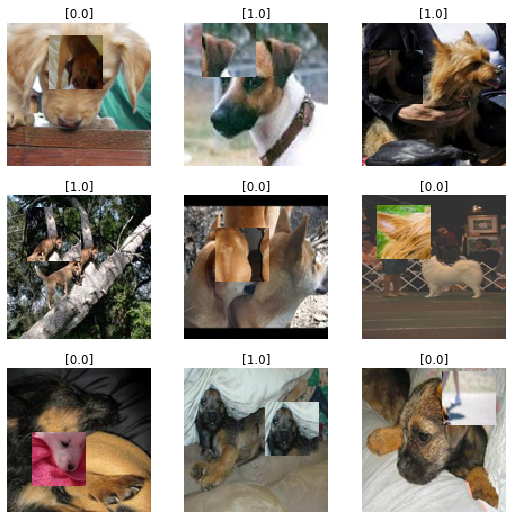

In [6]:
xb, yb = next(iter(dlt))
show_images(xb[:9], nrows=3, titles=yb[:9].tolist())

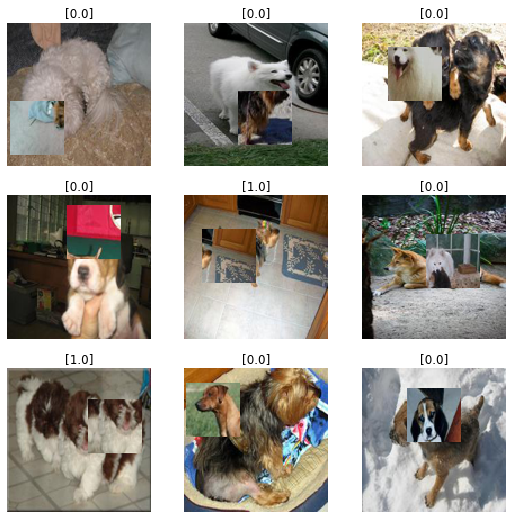

In [7]:
xv, yv = next(iter(dlv))
show_images(xv[:9], nrows=3, titles=yv[:9].tolist())

In [15]:
net = SingleInputBinaryModel(TorchvisionEncoder(), 
                             nn.Linear(2560, 1))

2020-09-11 04:13:06,211 [INFO]: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 1e-05
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0001
    weight_decay: 0

Parameter Group 2
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0001
    weight_decay: 0
)


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/hdmamin/img-wang/ddb7d385e364486b993f3a95cb823b49
COMET INFO:   Metrics:
COMET INFO:     loss : 0.858071506023407
COMET INFO:   Parameters:
COMET INFO:     _stop_training : 1
COMET INFO:     epochs         : 50
COMET INFO:     eps            : 0.001
COMET INFO:     lr_mult        : 1.0
COMET INFO:     lrs            : [1e-05, 0.0001, 0.0001]
COMET INFO:     mode           : binary
COMET INFO:     out_dir        : data/models/v0
COMET INFO:     thresh         : 0.5
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     os packages      



=====

Epoch 0

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6669 |       0.5997 |
| mean_soft_prediction |  0.4868 |       0.5061 |
| percent_positive     |  0.4812 |       0.5078 |


Saving model. Loss improved from inf to 0.5997.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 1

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5375 |       0.5122 |
| mean_soft_prediction |  0.4882 |       0.5237 |
| percent_positive     |  0.4835 |       0.5352 |


Saving model. Loss improved from 0.5997 to 0.5122.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 2

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4573 |       0.4389 |
| mean_soft_prediction |  0.5013 |       0.5290 |
| percent_positive     |  0.5104 |       0.5521 |


Saving model. Loss improved from 0.5122 to 0.4389.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 3

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4158 |       0.3951 |
| mean_soft_prediction |  0.4798 |       0.5137 |
| percent_positive     |  0.4787 |       0.5352 |


Saving model. Loss improved from 0.4389 to 0.3951.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 4

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3898 |       0.3480 |
| mean_soft_prediction |  0.4896 |       0.4847 |
| percent_positive     |  0.4970 |       0.4974 |


Saving model. Loss improved from 0.3951 to 0.3480.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 5

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3547 |       0.3562 |
| mean_soft_prediction |  0.4993 |       0.5337 |
| percent_positive     |  0.5067 |       0.5326 |





=====

Epoch 6

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3506 |       0.3289 |
| mean_soft_prediction |  0.5072 |       0.4813 |
| percent_positive     |  0.5172 |       0.4805 |


Saving model. Loss improved from 0.3480 to 0.3289.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 7

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3377 |       0.2821 |
| mean_soft_prediction |  0.4958 |       0.5240 |
| percent_positive     |  0.5039 |       0.5299 |


Saving model. Loss improved from 0.3289 to 0.2821.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 8

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2934 |       0.3202 |
| mean_soft_prediction |  0.5067 |       0.5236 |
| percent_positive     |  0.5168 |       0.5352 |





=====

Epoch 9

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3000 |       0.3134 |
| mean_soft_prediction |  0.4969 |       0.4894 |
| percent_positive     |  0.5082 |       0.4922 |





=====

Epoch 10

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2769 |       0.3177 |
| mean_soft_prediction |  0.4966 |       0.4902 |
| percent_positive     |  0.5067 |       0.5013 |





=====

Epoch 11

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2678 |       0.2828 |
| mean_soft_prediction |  0.5069 |       0.5015 |
| percent_positive     |  0.5159 |       0.4974 |





=====

Epoch 12

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2595 |       0.2803 |
| mean_soft_prediction |  0.5041 |       0.5186 |
| percent_positive     |  0.5097 |       0.5299 |


Saving model. Loss improved from 0.2821 to 0.2803.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 13

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2604 |       0.2811 |
| mean_soft_prediction |  0.5000 |       0.4873 |
| percent_positive     |  0.5067 |       0.4948 |





=====

Epoch 14

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2487 |       0.2456 |
| mean_soft_prediction |  0.5011 |       0.5265 |
| percent_positive     |  0.5120 |       0.5286 |


Saving model. Loss improved from 0.2803 to 0.2456.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 15

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2432 |       0.2532 |
| mean_soft_prediction |  0.5072 |       0.5295 |
| percent_positive     |  0.5142 |       0.5339 |





=====

Epoch 16

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2338 |       0.2425 |
| mean_soft_prediction |  0.5043 |       0.5040 |
| percent_positive     |  0.5111 |       0.5078 |


Saving model. Loss improved from 0.2456 to 0.2425.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 17

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2274 |       0.2636 |
| mean_soft_prediction |  0.4861 |       0.4982 |
| percent_positive     |  0.4948 |       0.5065 |





=====

Epoch 18

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2337 |       0.1905 |
| mean_soft_prediction |  0.4981 |       0.5101 |
| percent_positive     |  0.5048 |       0.5104 |


Saving model. Loss improved from 0.2425 to 0.1905.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 19

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2234 |       0.2167 |
| mean_soft_prediction |  0.4880 |       0.5188 |
| percent_positive     |  0.4975 |       0.5156 |





=====

Epoch 20

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2371 |       0.2070 |
| mean_soft_prediction |  0.5098 |       0.4998 |
| percent_positive     |  0.5181 |       0.5013 |





=====

Epoch 21

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2255 |       0.2288 |
| mean_soft_prediction |  0.4973 |       0.5321 |
| percent_positive     |  0.5039 |       0.5391 |





=====

Epoch 22

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2115 |       0.2385 |
| mean_soft_prediction |  0.4995 |       0.4986 |
| percent_positive     |  0.5058 |       0.5091 |





=====

Epoch 23

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2087 |       0.2091 |
| mean_soft_prediction |  0.4922 |       0.4900 |
| percent_positive     |  0.4999 |       0.5039 |





=====

Epoch 24

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2120 |       0.2439 |
| mean_soft_prediction |  0.4860 |       0.4711 |
| percent_positive     |  0.4932 |       0.4805 |


EarlyStopper halting training: validation loss has not improved enough in 6 epochs.

Training complete. Model in eval mode.


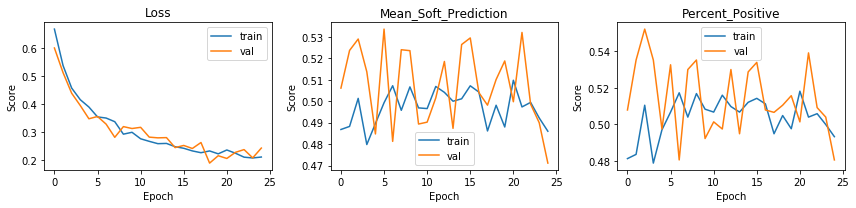

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/hdmamin/img-wang/b3e9a8f7ff5d476ab0c70d2d1876bf98
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [270]                      : (0.09041792899370193, 0.8469772338867188)
COMET INFO:     train_loss [25]                 : (0.20871544988067062, 0.6668792019287745)
COMET INFO:     train_mean_soft_prediction [25] : (0.4797929682665401, 0.5097881022978712)
COMET INFO:     train_percent_positive [25]     : (0.4787326388888889, 0.5180844907407407)
COMET INFO:     val_loss [25]                   : (0.19046316792567572, 0.599692369500796)
COMET INFO:     val_mean_soft_prediction [25]   : (0.4711315929889679, 0.5336628456910452)
COMET INFO:     val_percent_positive [25]       : (0.48046875, 0.5520833333333334)
COMET INFO:   Parameters:
COMET IN

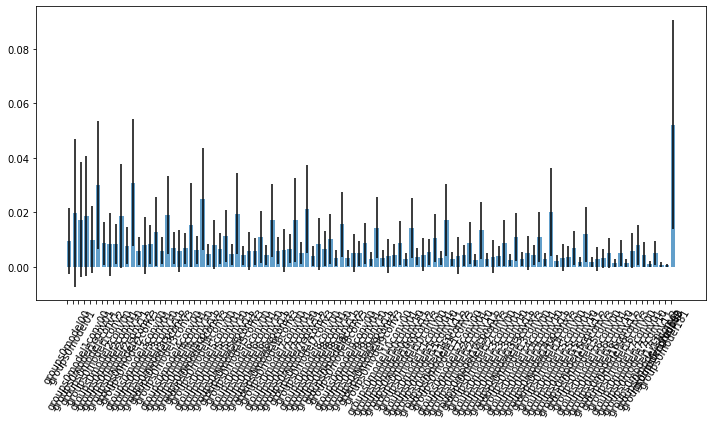

In [16]:
t = Trainer(net, dst, dsv, dlt, dlv, F.binary_cross_entropy_with_logits,
            mode='binary', out_dir='data/models/v0', last_act=torch.sigmoid,
            callbacks=[MetricHistory(None, None),
                       CometCallbackWithGrads('img_wang'),
                       ModelCheckpoint(),
                       EarlyStopper('loss', 'min', patience=5)],
            metrics=[mean_soft_prediction, percent_positive])
t.fit(50, [1e-5, 1e-4, 1e-4])

In [23]:
preds = t.predict(xb, logits=False)

In [38]:
titles = [f'Label: {y.item()}\nPred: {yhat.item():.3f}' 
          for y, yhat in zip(yb, preds)]

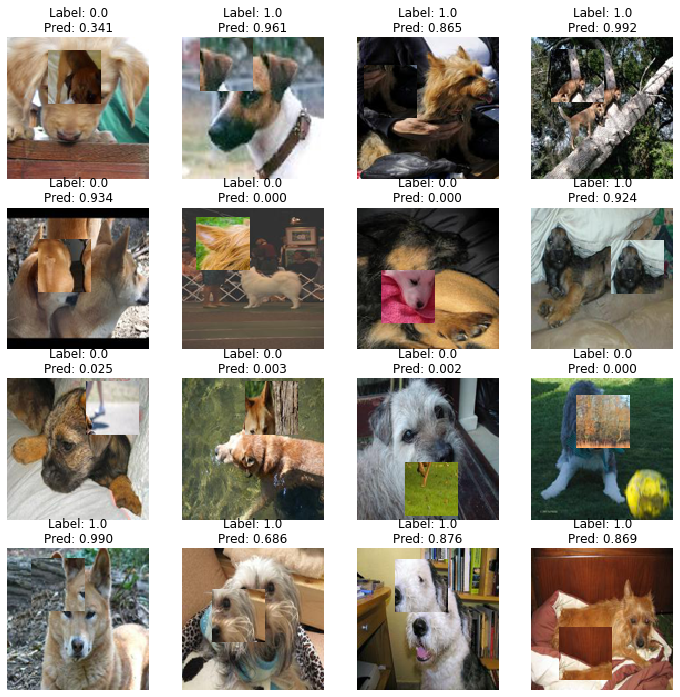

In [39]:
show_images(xb[:16], nrows=4, titles=titles[:16])

In [54]:
df = pd.DataFrame({'y': yb.squeeze(-1).numpy(), 
                   'y_proba': preds.squeeze(-1).cpu().numpy()})
df.ends()

y   y_proba
0   0.0  0.340635
1   1.0  0.961424
2   1.0  0.865085
61  1.0  0.994761
62  1.0  0.783265
63  1.0  0.790105

In [57]:
sorted_mistakes = df.lambda_sort(lambda x: abs(x.y - x.y_proba), ascending=False)
sorted_mistakes.head(5)

y   y_proba
4   0.0  0.934226
36  1.0  0.281552
59  1.0  0.353781
55  1.0  0.551003
33  1.0  0.582675

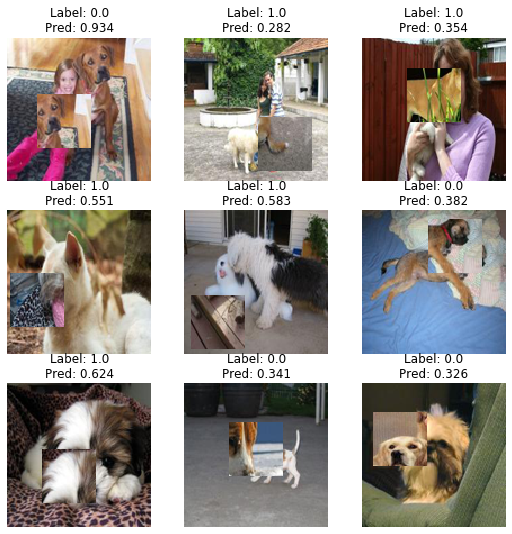

In [67]:
idx = sorted_mistakes.index.values
show_images([dst[i][0] for i in idx[:9]],
            nrows=3,
            titles=[titles[i] for i in idx[:9]])

### Notes

Looked at predictions on a single train batch. Possible error in dataset? Looks like the third image plotted above is labeled as a positive but it looks like a negative. Investigate.

## V1

Larger batch size and add std_soft_predictions as a metric.

In [4]:
dst, dsv, dlt, dlv = get_databunch('data/imagewang-160/unsup/', 
                                   mode='patchwork', bs=512, pct_pos=.5, 
                                   max_train_len=None, max_val_len=None, 
                                   debug_mode=None)

In [7]:
net = SingleInputBinaryModel(TorchvisionEncoder(), 
                             nn.Linear(2560, 1))

2020-09-12 05:24:41,559 [INFO]: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 1e-05
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0001
    weight_decay: 0

Parameter Group 2
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0001
    weight_decay: 0
)


COMET INFO: old comet version (3.1.16) detected. current: 3.2.0 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/hdmamin/img-wang/666ff0553ae14eaaa10dd5a0c91d37b1





=====

Epoch 0

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.7227 |       0.6885 |
| mean_soft_prediction |  0.4731 |       0.4972 |
| std_soft_prediction  |  0.1314 |       0.1199 |
| percent_positive     |  0.4175 |       0.5045 |


Saving model. Loss improved from inf to 0.6885.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 1

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6766 |       0.6391 |
| mean_soft_prediction |  0.5046 |       0.5075 |
| std_soft_prediction  |  0.1306 |       0.1358 |
| percent_positive     |  0.5201 |       0.5368 |


Saving model. Loss improved from 0.6885 to 0.6391.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 2

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6352 |       0.6481 |
| mean_soft_prediction |  0.4766 |       0.5402 |
| std_soft_prediction  |  0.1389 |       0.1454 |
| percent_positive     |  0.4408 |       0.6142 |





=====

Epoch 3

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6130 |       0.5879 |
| mean_soft_prediction |  0.4777 |       0.4673 |
| std_soft_prediction  |  0.1562 |       0.1674 |
| percent_positive     |  0.4480 |       0.4400 |


Saving model. Loss improved from 0.6391 to 0.5879.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 4

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5840 |       0.5721 |
| mean_soft_prediction |  0.4878 |       0.4926 |
| std_soft_prediction  |  0.1729 |       0.1826 |
| percent_positive     |  0.4799 |       0.5032 |


Saving model. Loss improved from 0.5879 to 0.5721.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 5

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5649 |       0.5587 |
| mean_soft_prediction |  0.4814 |       0.5228 |
| std_soft_prediction  |  0.1945 |       0.1971 |
| percent_positive     |  0.4630 |       0.5419 |


Saving model. Loss improved from 0.5721 to 0.5587.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 6

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5334 |       0.5179 |
| mean_soft_prediction |  0.4959 |       0.5141 |
| std_soft_prediction  |  0.2159 |       0.2264 |
| percent_positive     |  0.4985 |       0.5342 |


Saving model. Loss improved from 0.5587 to 0.5179.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 7

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5129 |       0.5088 |
| mean_soft_prediction |  0.4877 |       0.4932 |
| std_soft_prediction  |  0.2370 |       0.2500 |
| percent_positive     |  0.4827 |       0.4735 |


Saving model. Loss improved from 0.5179 to 0.5088.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 8

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4911 |       0.4745 |
| mean_soft_prediction |  0.4994 |       0.5193 |
| std_soft_prediction  |  0.2557 |       0.2637 |
| percent_positive     |  0.5098 |       0.5329 |


Saving model. Loss improved from 0.5088 to 0.4745.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 9

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4707 |       0.4907 |
| mean_soft_prediction |  0.4953 |       0.5020 |
| std_soft_prediction  |  0.2736 |       0.2837 |
| percent_positive     |  0.5000 |       0.5045 |





=====

Epoch 10

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4564 |       0.4905 |
| mean_soft_prediction |  0.4845 |       0.4933 |
| std_soft_prediction  |  0.2908 |       0.2993 |
| percent_positive     |  0.4769 |       0.4890 |





=====

Epoch 11

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4422 |       0.4199 |
| mean_soft_prediction |  0.4966 |       0.5090 |
| std_soft_prediction  |  0.3049 |       0.3162 |
| percent_positive     |  0.5036 |       0.5019 |


Saving model. Loss improved from 0.4745 to 0.4199.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 12

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4204 |       0.4180 |
| mean_soft_prediction |  0.5085 |       0.4869 |
| std_soft_prediction  |  0.3181 |       0.3188 |
| percent_positive     |  0.5174 |       0.4735 |


Saving model. Loss improved from 0.4199 to 0.4180.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 13

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4149 |       0.4311 |
| mean_soft_prediction |  0.4941 |       0.4909 |
| std_soft_prediction  |  0.3265 |       0.3343 |
| percent_positive     |  0.4974 |       0.4852 |





=====

Epoch 14

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3987 |       0.3922 |
| mean_soft_prediction |  0.5017 |       0.5198 |
| std_soft_prediction  |  0.3351 |       0.3466 |
| percent_positive     |  0.5096 |       0.5226 |


Saving model. Loss improved from 0.4180 to 0.3922.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 15

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3988 |       0.4231 |
| mean_soft_prediction |  0.5001 |       0.5056 |
| std_soft_prediction  |  0.3431 |       0.3499 |
| percent_positive     |  0.5048 |       0.5135 |





=====

Epoch 16

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3843 |       0.4286 |
| mean_soft_prediction |  0.5032 |       0.4862 |
| std_soft_prediction  |  0.3491 |       0.3473 |
| percent_positive     |  0.5087 |       0.4916 |





=====

Epoch 17

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3717 |       0.3909 |
| mean_soft_prediction |  0.5037 |       0.4936 |
| std_soft_prediction  |  0.3556 |       0.3577 |
| percent_positive     |  0.5141 |       0.5006 |


Saving model. Loss improved from 0.3922 to 0.3909.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 18

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3772 |       0.3816 |
| mean_soft_prediction |  0.4807 |       0.5168 |
| std_soft_prediction  |  0.3602 |       0.3643 |
| percent_positive     |  0.4862 |       0.5097 |


Saving model. Loss improved from 0.3909 to 0.3816.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 19

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3540 |       0.3731 |
| mean_soft_prediction |  0.5036 |       0.4821 |
| std_soft_prediction  |  0.3643 |       0.3651 |
| percent_positive     |  0.5116 |       0.4942 |


Saving model. Loss improved from 0.3816 to 0.3731.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 20

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3584 |       0.3927 |
| mean_soft_prediction |  0.4846 |       0.5339 |
| std_soft_prediction  |  0.3681 |       0.3683 |
| percent_positive     |  0.4940 |       0.5406 |





=====

Epoch 21

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3537 |       0.3537 |
| mean_soft_prediction |  0.5113 |       0.5043 |
| std_soft_prediction  |  0.3704 |       0.3782 |
| percent_positive     |  0.5230 |       0.5110 |


Saving model. Loss improved from 0.3731 to 0.3537.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 22

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3352 |       0.3262 |
| mean_soft_prediction |  0.4937 |       0.5026 |
| std_soft_prediction  |  0.3726 |       0.3810 |
| percent_positive     |  0.4983 |       0.4968 |


Saving model. Loss improved from 0.3537 to 0.3262.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 23

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3455 |       0.3418 |
| mean_soft_prediction |  0.5057 |       0.4839 |
| std_soft_prediction  |  0.3762 |       0.3809 |
| percent_positive     |  0.5119 |       0.4826 |





=====

Epoch 24

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3368 |       0.3727 |
| mean_soft_prediction |  0.4871 |       0.4936 |
| std_soft_prediction  |  0.3778 |       0.3774 |
| percent_positive     |  0.4902 |       0.4981 |





=====

Epoch 25

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3312 |       0.3522 |
| mean_soft_prediction |  0.4788 |       0.4770 |
| std_soft_prediction  |  0.3800 |       0.3807 |
| percent_positive     |  0.4847 |       0.4826 |





=====

Epoch 26

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3323 |       0.3431 |
| mean_soft_prediction |  0.4934 |       0.5090 |
| std_soft_prediction  |  0.3829 |       0.3784 |
| percent_positive     |  0.4998 |       0.5381 |





=====

Epoch 27

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2992 |       0.3149 |
| mean_soft_prediction |  0.5023 |       0.4869 |
| std_soft_prediction  |  0.3865 |       0.3878 |
| percent_positive     |  0.5132 |       0.4994 |


Saving model. Loss improved from 0.3262 to 0.3149.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 28

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3151 |       0.3428 |
| mean_soft_prediction |  0.5027 |       0.4748 |
| std_soft_prediction  |  0.3880 |       0.3890 |
| percent_positive     |  0.5096 |       0.4800 |





=====

Epoch 29

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3194 |       0.3331 |
| mean_soft_prediction |  0.5021 |       0.4820 |
| std_soft_prediction  |  0.3906 |       0.3944 |
| percent_positive     |  0.5095 |       0.4955 |





=====

Epoch 30

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3086 |       0.3246 |
| mean_soft_prediction |  0.4900 |       0.4592 |
| std_soft_prediction  |  0.3914 |       0.3911 |
| percent_positive     |  0.4992 |       0.4671 |





=====

Epoch 31

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3049 |       0.3460 |
| mean_soft_prediction |  0.4983 |       0.4710 |
| std_soft_prediction  |  0.3923 |       0.3951 |
| percent_positive     |  0.5060 |       0.4800 |





=====

Epoch 32

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3102 |       0.3137 |
| mean_soft_prediction |  0.5035 |       0.4996 |
| std_soft_prediction  |  0.3941 |       0.3966 |
| percent_positive     |  0.5110 |       0.5071 |


Saving model. Loss improved from 0.3149 to 0.3137.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 33

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2908 |       0.3290 |
| mean_soft_prediction |  0.5030 |       0.4815 |
| std_soft_prediction  |  0.3969 |       0.4022 |
| percent_positive     |  0.5144 |       0.4942 |





=====

Epoch 34

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2849 |       0.2576 |
| mean_soft_prediction |  0.4984 |       0.4930 |
| std_soft_prediction  |  0.3962 |       0.4038 |
| percent_positive     |  0.5047 |       0.5006 |


Saving model. Loss improved from 0.3137 to 0.2576.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 35

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2966 |       0.2966 |
| mean_soft_prediction |  0.4879 |       0.4872 |
| std_soft_prediction  |  0.4011 |       0.4102 |
| percent_positive     |  0.4967 |       0.4994 |





=====

Epoch 36

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2815 |       0.3134 |
| mean_soft_prediction |  0.4992 |       0.5085 |
| std_soft_prediction  |  0.4049 |       0.3981 |
| percent_positive     |  0.5057 |       0.5200 |





=====

Epoch 37

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2791 |       0.3157 |
| mean_soft_prediction |  0.5013 |       0.5064 |
| std_soft_prediction  |  0.4026 |       0.4013 |
| percent_positive     |  0.5137 |       0.5200 |





=====

Epoch 38

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2804 |       0.2801 |
| mean_soft_prediction |  0.4965 |       0.4997 |
| std_soft_prediction  |  0.4051 |       0.4089 |
| percent_positive     |  0.5072 |       0.5058 |





=====

Epoch 39

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2683 |       0.2855 |
| mean_soft_prediction |  0.5182 |       0.4836 |
| std_soft_prediction  |  0.4060 |       0.4112 |
| percent_positive     |  0.5281 |       0.4994 |





=====

Epoch 40

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2688 |       0.2787 |
| mean_soft_prediction |  0.4861 |       0.4888 |
| std_soft_prediction  |  0.4057 |       0.4092 |
| percent_positive     |  0.4941 |       0.5019 |


EarlyStopper halting training: validation loss has not improved enough in 6 epochs.

Training complete. Model in eval mode.


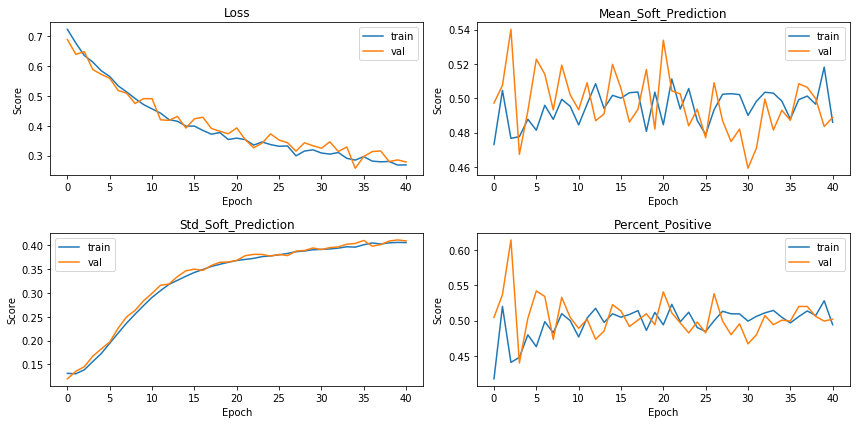

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/hdmamin/img-wang/666ff0553ae14eaaa10dd5a0c91d37b1
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [54]                       : (0.24368569254875183, 0.8502534031867981)
COMET INFO:     train_loss [41]                 : (0.26834842333426845, 0.7227101234289316)
COMET INFO:     train_mean_soft_prediction [41] : (0.4730553145592029, 0.5181694947756253)
COMET INFO:     train_percent_positive [41]     : (0.41751802884615385, 0.5280949519230769)
COMET INFO:     train_std_soft_prediction [41]  : (0.13055092268265212, 0.40604310769301194)
COMET INFO:     val_loss [41]                   : (0.2575946657888351, 0.6884917103090594)
COMET INFO:     val_mean_soft_prediction [41]   : (0.459208349450942, 0.5401970214228476)
COMET INFO:     val_perc

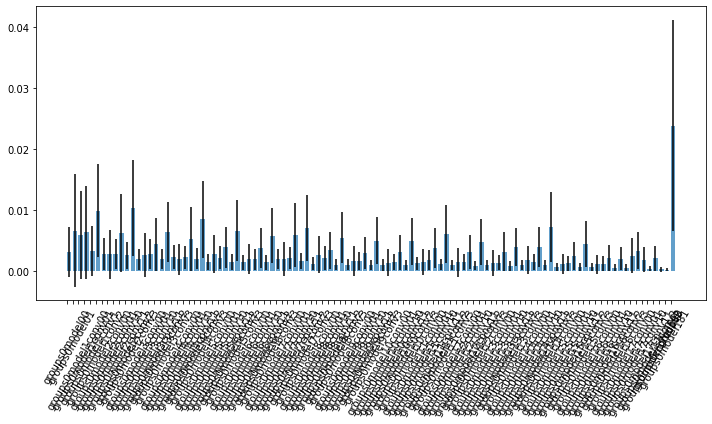

In [8]:
t = Trainer(net, dst, dsv, dlt, dlv, F.binary_cross_entropy_with_logits,
            mode='binary', out_dir='data/models/v1', last_act=torch.sigmoid,
            callbacks=[MetricHistory(None, None),
                       CometCallbackWithGrads('img_wang'),
                       ModelCheckpoint(),
                       EarlyStopper('loss', 'min', patience=5)],
            metrics=[mean_soft_prediction, std_soft_prediction, percent_positive])
t.fit(50, [1e-5, 1e-4, 1e-4])

## V2

Encoder with pretrained=False to test my suspicion that this won't work without transfer learning. Drop batch size down to 256 and increase LR (no differential LRs because everything is randomly initialized). 

In [6]:
dst, dsv, dlt, dlv = get_databunch('data/imagewang-160/unsup/', 
                                   mode='patchwork', bs=256, pct_pos=.5)

In [7]:
net = SingleInputBinaryModel(TorchvisionEncoder(pretrained=False), 
                             nn.Linear(2560, 1))

2020-09-14 03:40:03,293 [INFO]: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0002
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0002
    weight_decay: 0

Parameter Group 2
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0002
    weight_decay: 0
)


COMET INFO: old comet version (3.1.16) detected. current: 3.2.0 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/hdmamin/img-wang/16287a52711e4f7d94ce4dcd67ba7e81





=====

Epoch 0

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.7549 |       0.7082 |
| mean_soft_prediction |  0.4944 |       0.5805 |
| std_soft_prediction  |  0.0647 |       0.0000 |
| percent_positive     |  0.5126 |       1.0000 |


Saving model. Loss improved from inf to 0.7082.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 1

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.7130 |       0.7117 |
| mean_soft_prediction |  0.5232 |       0.5899 |
| std_soft_prediction  |  0.0619 |       0.0013 |
| percent_positive     |  0.5537 |       1.0000 |





=====

Epoch 2

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6943 |       0.7684 |
| mean_soft_prediction |  0.5091 |       0.6842 |
| std_soft_prediction  |  0.0713 |       0.0407 |
| percent_positive     |  0.5298 |       1.0000 |





=====

Epoch 3

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6914 |       0.7250 |
| mean_soft_prediction |  0.5106 |       0.6059 |
| std_soft_prediction  |  0.0727 |       0.0677 |
| percent_positive     |  0.5195 |       0.9600 |





=====

Epoch 4

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6938 |       0.7141 |
| mean_soft_prediction |  0.5107 |       0.6039 |
| std_soft_prediction  |  0.0780 |       0.0744 |
| percent_positive     |  0.5152 |       0.9226 |





=====

Epoch 5

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6903 |       0.7096 |
| mean_soft_prediction |  0.5101 |       0.5837 |
| std_soft_prediction  |  0.0794 |       0.0794 |
| percent_positive     |  0.5074 |       0.8594 |





=====

Epoch 6

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6870 |       0.7206 |
| mean_soft_prediction |  0.5100 |       0.5998 |
| std_soft_prediction  |  0.0871 |       0.0863 |
| percent_positive     |  0.5111 |       0.8903 |


EarlyStopper halting training: validation loss has not improved enough in 6 epochs.

Training complete. Model in eval mode.


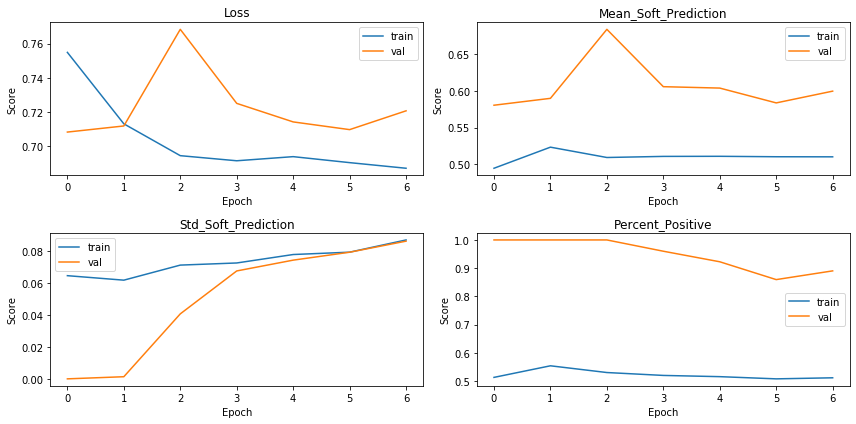

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/hdmamin/img-wang/16287a52711e4f7d94ce4dcd67ba7e81
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [19]                      : (0.6743210554122925, 1.0385172367095947)
COMET INFO:     train_loss [7]                 : (0.6869715165208887, 0.7548710593470821)
COMET INFO:     train_mean_soft_prediction [7] : (0.49437661800119614, 0.5232017216859041)
COMET INFO:     train_percent_positive [7]     : (0.5073784722222222, 0.5536747685185185)
COMET INFO:     train_std_soft_prediction [7]  : (0.06188028195389995, 0.08709521177742216)
COMET INFO:     val_loss [7]                   : (0.7081725267441042, 0.7683670921479502)
COMET INFO:     val_mean_soft_prediction [7]   : (0.58052212215239, 0.684214426471341)
COMET INFO:     val_percent_positiv

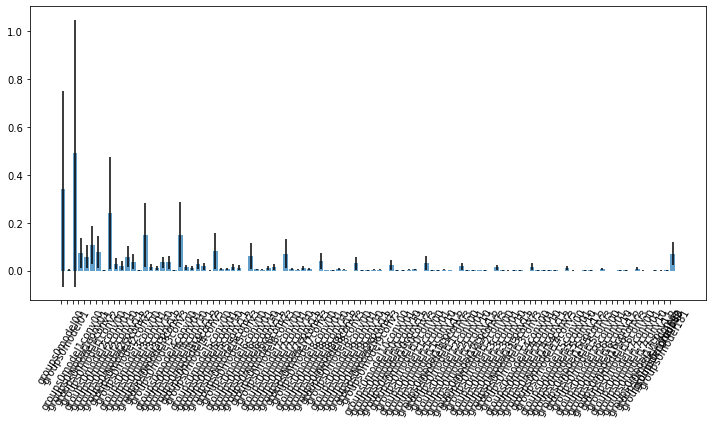

In [8]:
t = Trainer(net, dst, dsv, dlt, dlv, F.binary_cross_entropy_with_logits,
            mode='binary', out_dir='data/models/v1', last_act=torch.sigmoid,
            callbacks=[MetricHistory(None, None),
                       CometCallbackWithGrads('img_wang'),
                       ModelCheckpoint(),
                       EarlyStopper('loss', 'min', patience=5)],
            metrics=[mean_soft_prediction, std_soft_prediction, percent_positive])
t.fit(50, 2e-4)

## V3

Tried replacing torchvision arch with my encoder and my 1 layer classification head with the fastai classification head. Epoching blog's example did not train their encoder separately and still got solid results so I'm wondering if I'm not giving the classifier enough "firepower" compared to the encoder. I think it's more likely that their simple task is just more useful/doable than this patchwork task, which I'm having some doubts about.

In [6]:
dst, dsv, dlt, dlv = get_databunch('data/imagewang-160/unsup/', 
                                   mode='patchwork', bs=256, pct_pos=.5)

In [11]:
net = SingleInputBinaryModel(Encoder(), ps=.1)

2020-09-14 04:11:21,443 [INFO]: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0003
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0003
    weight_decay: 0

Parameter Group 2
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0003
    weight_decay: 0
)


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/hdmamin/img-wang/dc7aae4890e4435088a6076fc40a3cc9





=====

Epoch 0

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6715 |       2.4206 |
| mean_soft_prediction |  0.4955 |       0.9918 |
| std_soft_prediction  |  0.1673 |       0.0019 |
| percent_positive     |  0.4602 |       1.0000 |
| accuracy             |  0.5901 |       0.4942 |
| f1                   |  0.5765 |       0.6612 |
| recall               |  0.5495 |       1.0000 |
| precision            |  0.6094 |       0.4942 |
| roc_auc              |  0.6318 |       0.6217 |





=====

Epoch 1

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6017 |       0.6722 |
| mean_soft_prediction |  0.4958 |       0.6215 |
| std_soft_prediction  |  0.2112 |       0.2066 |
| percent_positive     |  0.4734 |       0.7342 |
| accuracy             |  0.6707 |       0.6129 |
| f1                   |  0.6644 |       0.6850 |
| recall               |  0.6428 |       0.8517 |
| precision            |  0.6901 |       0.5739 |
| roc_auc              |  0.7398 |       0.7070 |





=====

Epoch 2

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5802 |       0.6193 |
| mean_soft_prediction |  0.4981 |       0.4777 |
| std_soft_prediction  |  0.2300 |       0.2299 |
| percent_positive     |  0.4857 |       0.4568 |
| accuracy             |  0.6865 |       0.6529 |
| f1                   |  0.6847 |       0.6345 |
| recall               |  0.6716 |       0.6105 |
| precision            |  0.7030 |       0.6617 |
| roc_auc              |  0.7642 |       0.7201 |





=====

Epoch 3

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5652 |       0.6313 |
| mean_soft_prediction |  0.5016 |       0.5322 |
| std_soft_prediction  |  0.2371 |       0.2377 |
| percent_positive     |  0.4909 |       0.5471 |
| accuracy             |  0.7056 |       0.6710 |
| f1                   |  0.7052 |       0.6832 |
| recall               |  0.6951 |       0.7217 |
| precision            |  0.7202 |       0.6516 |
| roc_auc              |  0.7812 |       0.7252 |





=====

Epoch 4

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5425 |       0.6174 |
| mean_soft_prediction |  0.5037 |       0.5682 |
| std_soft_prediction  |  0.2506 |       0.2223 |
| percent_positive     |  0.5014 |       0.6219 |
| accuracy             |  0.7264 |       0.6581 |
| f1                   |  0.7287 |       0.6930 |
| recall               |  0.7254 |       0.7822 |
| precision            |  0.7356 |       0.6228 |
| roc_auc              |  0.8043 |       0.7397 |





=====

Epoch 5

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5027 |       0.6133 |
| mean_soft_prediction |  0.5072 |       0.6074 |
| std_soft_prediction  |  0.2726 |       0.2470 |
| percent_positive     |  0.5161 |       0.6658 |
| accuracy             |  0.7556 |       0.6658 |
| f1                   |  0.7610 |       0.7113 |
| recall               |  0.7682 |       0.8342 |
| precision            |  0.7578 |       0.6204 |
| roc_auc              |  0.8380 |       0.7664 |





=====

Epoch 6

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4746 |       0.7438 |
| mean_soft_prediction |  0.5104 |       0.6827 |
| std_soft_prediction  |  0.2951 |       0.2458 |
| percent_positive     |  0.5224 |       0.7510 |
| accuracy             |  0.7756 |       0.6271 |
| f1                   |  0.7822 |       0.7005 |
| recall               |  0.7953 |       0.8830 |
| precision            |  0.7735 |       0.5814 |
| roc_auc              |  0.8563 |       0.7262 |





=====

Epoch 7

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4571 |       0.7610 |
| mean_soft_prediction |  0.5085 |       0.7198 |
| std_soft_prediction  |  0.3075 |       0.2210 |
| percent_positive     |  0.5211 |       0.8194 |
| accuracy             |  0.7836 |       0.6000 |
| f1                   |  0.7891 |       0.6951 |
| recall               |  0.8002 |       0.9246 |
| precision            |  0.7810 |       0.5575 |
| roc_auc              |  0.8687 |       0.7389 |





=====

Epoch 8

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4221 |       0.6427 |
| mean_soft_prediction |  0.5117 |       0.6105 |
| std_soft_prediction  |  0.3212 |       0.2724 |
| percent_positive     |  0.5220 |       0.6516 |
| accuracy             |  0.8084 |       0.6723 |
| f1                   |  0.8136 |       0.7140 |
| recall               |  0.8264 |       0.8283 |
| precision            |  0.8045 |       0.6288 |
| roc_auc              |  0.8907 |       0.7580 |





=====

Epoch 9

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3915 |       0.8439 |
| mean_soft_prediction |  0.5136 |       0.7608 |
| std_soft_prediction  |  0.3385 |       0.2270 |
| percent_positive     |  0.5263 |       0.8594 |
| accuracy             |  0.8241 |       0.5961 |
| f1                   |  0.8291 |       0.7015 |
| recall               |  0.8451 |       0.9610 |
| precision            |  0.8164 |       0.5530 |
| roc_auc              |  0.9060 |       0.7595 |





=====

Epoch 10

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3826 |       0.7085 |
| mean_soft_prediction |  0.5164 |       0.6084 |
| std_soft_prediction  |  0.3509 |       0.3003 |
| percent_positive     |  0.5320 |       0.6426 |
| accuracy             |  0.8280 |       0.6348 |
| f1                   |  0.8343 |       0.6776 |
| recall               |  0.8565 |       0.7796 |
| precision            |  0.8170 |       0.6003 |
| roc_auc              |  0.9109 |       0.7305 |





=====

Epoch 11

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3561 |       0.8788 |
| mean_soft_prediction |  0.5174 |       0.7547 |
| std_soft_prediction  |  0.3601 |       0.2488 |
| percent_positive     |  0.5352 |       0.8181 |
| accuracy             |  0.8451 |       0.6116 |
| f1                   |  0.8508 |       0.7040 |
| recall               |  0.8748 |       0.9350 |
| precision            |  0.8310 |       0.5654 |
| roc_auc              |  0.9236 |       0.7450 |


EarlyStopper halting training: validation loss has not improved enough in 6 epochs.

Training complete. Model in eval mode.


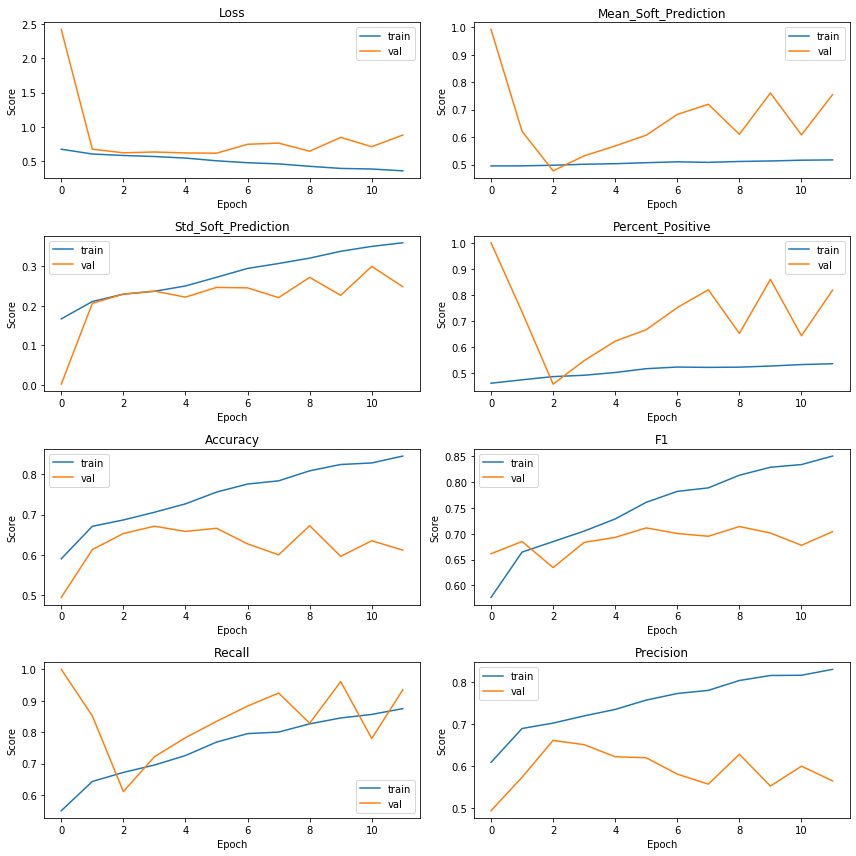

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/hdmamin/img-wang/dc7aae4890e4435088a6076fc40a3cc9
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [33]                       : (0.31622135639190674, 0.7695476412773132)
COMET INFO:     train_accuracy [12]             : (0.5901331018518519, 0.8450520833333334)
COMET INFO:     train_f1 [12]                   : (0.5764668553218116, 0.8507567984422663)
COMET INFO:     train_loss [12]                 : (0.3560681332040716, 0.6715458675667092)
COMET INFO:     train_mean_soft_prediction [12] : (0.49546146392822266, 0.5174009799957275)
COMET INFO:     train_percent_positive [12]     : (0.46021412037037035, 0.53515625)
COMET INFO:     train_precision [12]            : (0.6093576101162311, 0.8310240193783095)
COMET INFO:     train_recall [12]

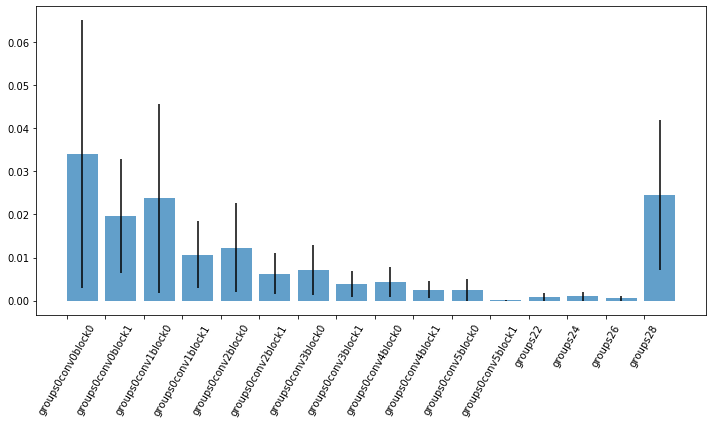

In [13]:
t = Trainer(net, dst, dsv, dlt, dlv, F.binary_cross_entropy_with_logits,
            mode='binary', out_dir='data/models/v1', last_act=torch.sigmoid,
            callbacks=[MetricHistory(None, None),
                       CometCallbackWithGrads('img_wang'),
                       EarlyStopper('loss', 'min', patience=5)],
            metrics=[mean_soft_prediction, std_soft_prediction, percent_positive, 
                     accuracy_score, f1_score, recall_score, precision_score,
                     roc_auc_score])
t.fit(50, 3e-4)

In [14]:
def top_mistakes(xb, yb, n=16, df=None):
    if df is None:
        preds = t.predict(xb, logits=False)
        titles = [f'Label: {y.item()}\nPred: {yhat.item():.3f}' 
                  for y, yhat in zip(yb, preds)]
        df = pd.DataFrame({'y': yb.squeeze(-1).numpy(), 
                           'y_proba': preds.squeeze(-1).cpu().numpy()})
    sorted_mistakes = df.lambda_sort(lambda x: abs(x.y - x.y_proba), 
                                     ascending=False)
    idx = sorted_mistakes.index.values
    show_images([dst[i][0] for i in idx[:n]],
                nrows=int(np.ceil(np.sqrt(n))),
                titles=[titles[i] for i in idx[:n]])
    return df

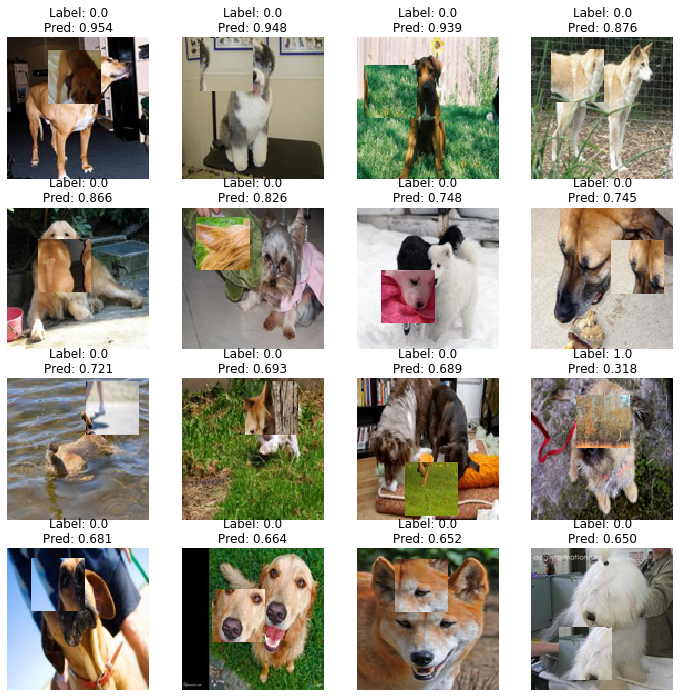

In [15]:
xb, yb = next(iter(dlt))
dft = top_mistakes(xb, yb)

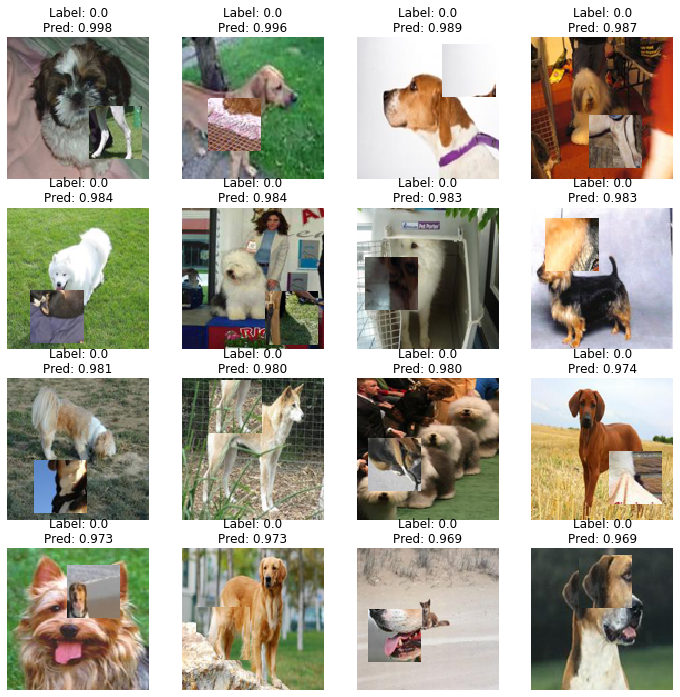

In [16]:
xbv, ybv = next(iter(dlv))
dfv = top_mistakes(xbv, ybv)

Some of these samples are labeled as negatives but definitely look like positives. I wonder if there are duplicates in the dataset? If not, that would be a weird bug - can't imagine what would cause that.

There was at least 1 example, though, that looked like the opposite problem (labeled as positive but looks like it came from a different image). That seems like evidence in favor of the "bug" issue over the "duplicates" issue.